In [1]:
from scipy.spatial.distance import mahalanobis
import scipy as sp
import pandas as pd
import dill
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# dill.dump_session('RKAFE.db')
dill.load_session('RKAFE.db')

In [3]:
df = pd.read_csv('rkp511.csv')
df.head()

,Locality,partno1,Male,Female,Coffee.shops,Salon,buy,rent,yf_LH,ratio,m_dist,r_dist
0,Munirka DDA flats,156,394,400,4,2,12000,27.0,25.250000,1.015228,0.28,0.28
1,Munirka DDA flats,152,428,437,4,2,12000,27.0,23.340961,1.021028,0.28,0.28
2,Munirka DDA flats,155,481,482,4,2,12000,27.0,21.161826,1.002079,0.28,0.28
3,Munirka DDA flats,153,415,459,4,2,12000,27.0,23.747277,1.106024,0.28,0.28
4,Munirka DDA flats,154,471,528,4,2,12000,27.0,25.568182,1.121019,0.28,0.28


In [2]:
b_class = np.sum((df['r_dist'] < -1).values.ravel())
u_class = np.sum((df['r_dist'] > 1).values.ravel())
m_class = df['r_dist'].count() - (b_class + u_class)
print('No of Backward class : {},\nNo of Middle class : {} &\nNo of Upper class families : {}'
      .format(b_class, m_class, u_class))

No of Backward class : 34,
No of Middle class : 21 &
No of Upper class families : 37


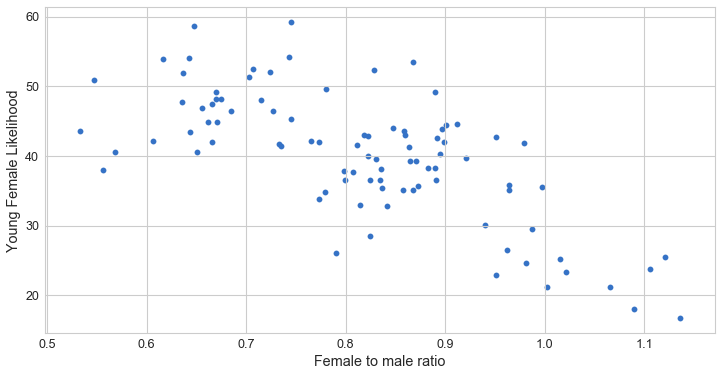

In [39]:
plt.figure(figsize=(12, 6))
plt.xlabel('Female to male ratio')
plt.ylabel('Young Female Likelihood')

plt.scatter(df['ratio'], df['yf_LH'])

#inferences about below graph
# young female likelihood decreases as female ratio increases
plt.savefig('yf_lh-ratio.png')

In [10]:
labels = ['B_class', 'M_class', 'U_class']
bins = [-20, -1, 1, 20]
df['Class'] = pd.cut(df['r_dist'], bins, labels = labels)

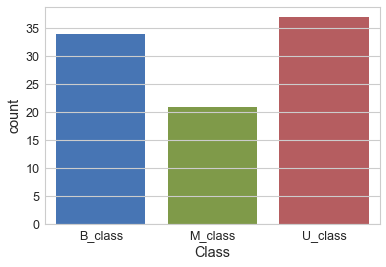

In [45]:
sns.countplot(df['Class'])
# inference about below graph
# there are more upper class in rk puram constitution 
# there are lesser areas near centroid compared to farther areas from the centroid


In [2]:
labels = ['Low_ratio', 'Fair_ratio', 'High_ratio']
bins = [0, 0.6, 1.0, 2.0]
df['F2M_cat'] = pd.cut(df['ratio'], bins, labels = labels)

# Analysis below about female ratio according to different classes of society

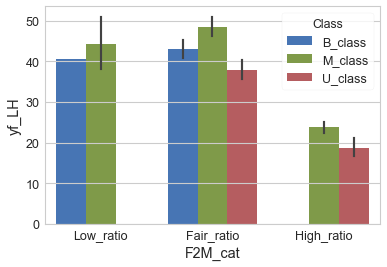

In [44]:
sns.barplot(x=df['F2M_cat'], y=df['yf_LH'], hue = df['Class'])
# inference about below graph
# as we can see for low female ratio there are no young female likelihood in upper class area
# and also for high female ratio there are no young female likelihood in backward class area


In [18]:
from sklearn.preprocessing import StandardScaler

features = ['Coffee.shops', 'Salon', 'buy']

# Separating out the features
x = df.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

/home/kei0s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/kei0s/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


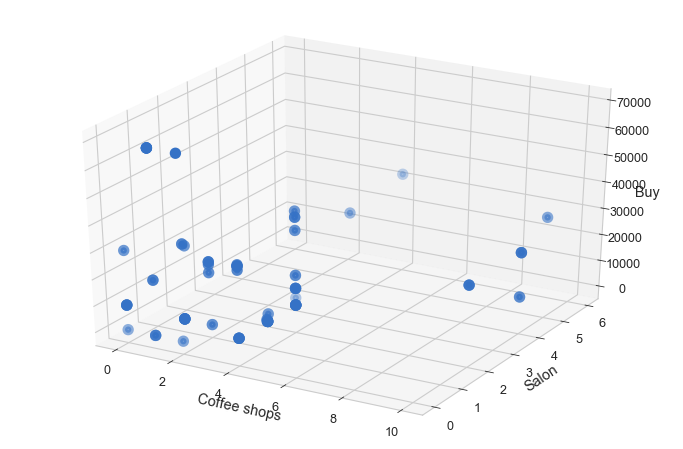

In [47]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# fig = plt.figure()
cm = plt.get_cmap("RdYlGn")
col = np.arange(92)

fig = plt.figure(figsize=(12.,8.))
ax = plt.axes(projection='3d')
ax.scatter3D(df['Coffee.shops'], df['Salon'], df['buy'], marker='o', s=40, linewidths=5)
# ax.scatter(x[:,0], x[:,1], x[:,2], c=x[:,2], marker='o', s=40, linewidths=5)
ax.set_xlabel('Coffee shops')
ax.set_ylabel('Salon')
ax.set_zlabel('Buy')
fig.savefig('beforeNorm.png')

In [237]:
# df.sort_values(by=['m_dist'])
# df[df['Class'] == 'M_class'].count()
df_rk = pd.read_excel('data about rk puram.xlsx')
df_rk.head()
# df_rk.sort_values(by=['Part No'])

,Constituency,Locality,Part No,Unnamed: 3,Male,Female,Coffee Shops,Salon,Buy/per sqft,Rent/per sqrt,Young Women %,Married_F,YF,MYF
0,RKPURAM- AC-44,satyaniketan,1,NaN,660,588,10,4,9200.0,49.0,36.564626,427,209,76
1,NaN,satyaniketan,2,NaN,486,480,10,4,9200.0,49.0,29.583333,342,139,39
2,NaN,satyaniketan,3,NaN,626,525,10,4,NaN,NaN,44.952381,362,235,89
3,NaN,satyaniketan,4,NaN,443,362,10,2,NaN,NaN,48.342541,240,175,72
4,NaN,satyaniketan,5,NaN,444,356,10,2,NaN,NaN,38.202247,252,135,57


In [238]:
# df_rk.sort_values(by=['Married_F'])
a = [0]*len(df1)
for i in range(92):
    for j in range(156):
        if (df1['partno1'][i] == df_rk['Part No'][j]):
            a[i] = df_rk['MYF'][j]
        
len(a)

92

In [239]:
# df.head()
# df['partno1']
# df1 = df.sort_values(by=['partno1'], ascending=True)
# x = np.randn(92)
# df1 = df1.reset_index()
# df1
# df1.sort_values(by=['partno1'], ascending=False)
df1['MYF'] = a
# df1.drop('MYF_LH', axis=1, inplace=True)
df1.head()

,Locality,partno1,Male,Female,Coffee.shops,Salon,buy,rent,yf_LH,ratio,m_dist,r_dist,Class,F2M_cat,Married_F,YF,MYF
0,satyaniketan,1,660,588,10,4,9200,49.0,36.564626,0.890909,7.52,-7.52,B_class,Fair_ratio,427,209,76
1,satyaniketan,2,486,480,10,4,9200,49.0,29.583333,0.987654,7.52,-7.52,B_class,Fair_ratio,342,139,39
2,Nanakpura,6,514,442,3,2,0,0.0,42.986425,0.859922,1.22,-1.22,B_class,Fair_ratio,338,186,98
3,Nanakpura,7,456,370,3,2,0,0.0,41.621622,0.811404,1.22,-1.22,B_class,Fair_ratio,295,150,90
4,Nanakpura,8,446,387,3,3,0,0.0,53.488372,0.867713,2.99,-2.99,B_class,Fair_ratio,290,198,116


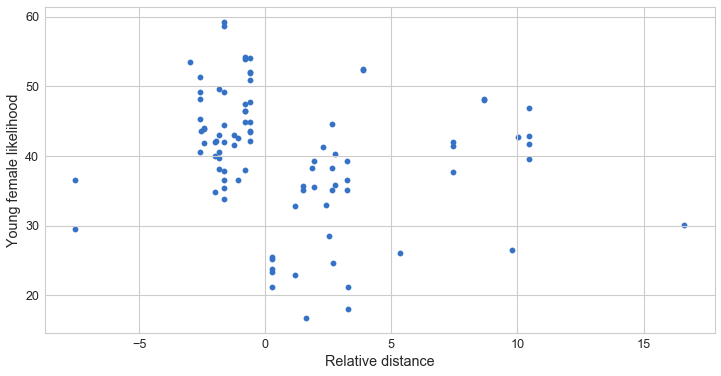

In [38]:
# df_rk['Married_F'][0]
plt.figure(figsize=(12, 6))
plt.xlabel('Relative distance')
plt.ylabel('Young female likelihood')
plt.scatter(df['r_dist'], df['yf_LH'])
# inference about below graph
# there are more young female near the centroid that means near munirka dda flats
plt.savefig('yf_lh-r_dist.png')

In [228]:
# df1['partno1'][6] == df_rk['Part No'][6]
# df_rk['Married_F'][155]
# (df['yf_LH']/100 )* df['Female']
df1.head()

,Locality,partno1,Male,Female,Coffee.shops,Salon,buy,rent,yf_LH,ratio,m_dist,r_dist,Class,F2M_cat,Married_F,YF
0,satyaniketan,1,660,588,10,4,9200,49.0,36.564626,0.890909,7.52,-7.52,B_class,Fair_ratio,427,209
1,satyaniketan,2,486,480,10,4,9200,49.0,29.583333,0.987654,7.52,-7.52,B_class,Fair_ratio,342,139
2,Nanakpura,6,514,442,3,2,0,0.0,42.986425,0.859922,1.22,-1.22,B_class,Fair_ratio,338,186
3,Nanakpura,7,456,370,3,2,0,0.0,41.621622,0.811404,1.22,-1.22,B_class,Fair_ratio,295,150
4,Nanakpura,8,446,387,3,3,0,0.0,53.488372,0.867713,2.99,-2.99,B_class,Fair_ratio,290,198


In [241]:
df1['MYF_LH'] = df1['MYF']/df1['YF'] *100

df1.head()

,Locality,partno1,Male,Female,Coffee.shops,Salon,buy,rent,yf_LH,ratio,m_dist,r_dist,Class,F2M_cat,Married_F,YF,MYF,MYF_LH
0,satyaniketan,1,660,588,10,4,9200,49.0,36.564626,0.890909,7.52,-7.52,B_class,Fair_ratio,427,209,76,36.363636
1,satyaniketan,2,486,480,10,4,9200,49.0,29.583333,0.987654,7.52,-7.52,B_class,Fair_ratio,342,139,39,28.057554
2,Nanakpura,6,514,442,3,2,0,0.0,42.986425,0.859922,1.22,-1.22,B_class,Fair_ratio,338,186,98,52.688172
3,Nanakpura,7,456,370,3,2,0,0.0,41.621622,0.811404,1.22,-1.22,B_class,Fair_ratio,295,150,90,60.000000
4,Nanakpura,8,446,387,3,3,0,0.0,53.488372,0.867713,2.99,-2.99,B_class,Fair_ratio,290,198,116,58.585859


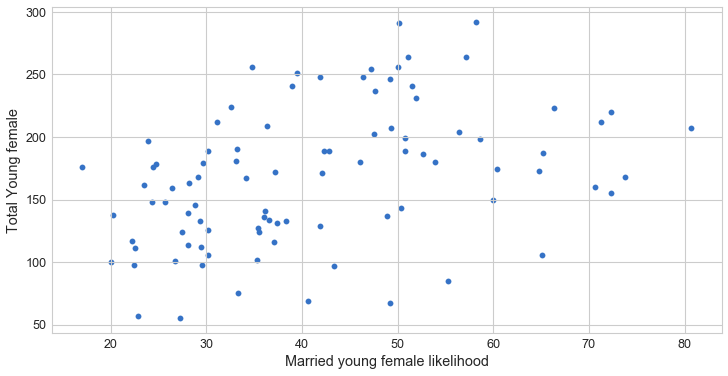

In [36]:
plt.figure(figsize=(12, 6))
plt.xlabel('Married young female likelihood')
plt.ylabel('Total Young female')
plt.scatter(x = df1['MYF_LH'], y=df1['YF'])
# inference about below graph
# as married young female likelihood increases, total young female increases
plt.savefig('tyf-myf_lh.png')

/home/kei0s/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


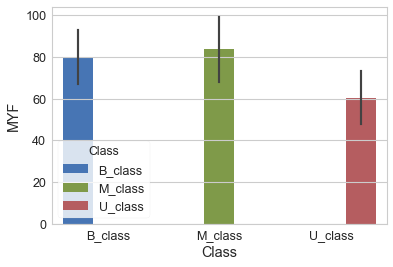

In [41]:
sns.barplot(x=df1['Class'], y=df1['MYF'], hue = df1['Class'])
# inference about below graph
# there are more married young female near the middle class or centroid area


/home/kei0s/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


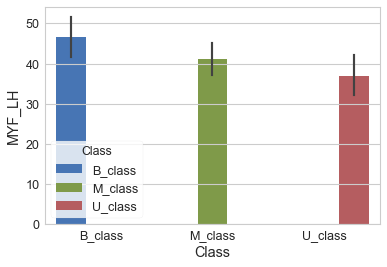

In [42]:
# Backward class consists of more married young female likelihood
sns.barplot(x=df1['Class'], y=df1['MYF_LH'], hue = df1['Class'])
# compared above inference where there are more married young female near centroid 
# here we can seee that married young female likelihood is more compared to centroid area


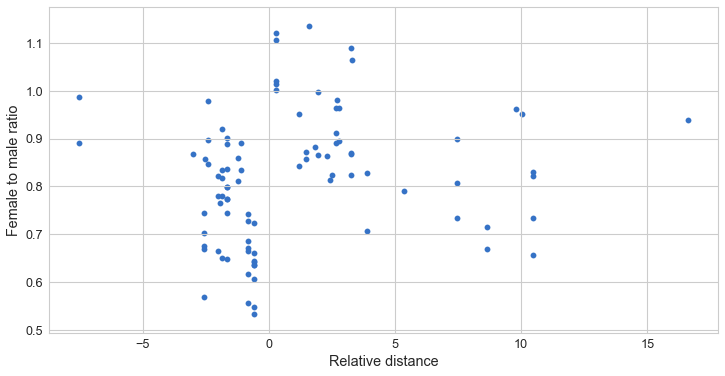

In [35]:
# area vise female to male ratio
plt.figure(figsize=(12, 6))
plt.scatter(x=df1['r_dist'], y=df1['ratio'])
plt.xlabel('Relative distance')
plt.ylabel('Female to male ratio')
# inference about below graph
# female are more near centroid that means female are more near munirka dda flats
plt.savefig('fem-r_dist.png')

In [6]:
df1.head()
df1.to_excel('rkp511.xlsx')

In [43]:
# df1.sort_values(by='MYF', ascending=False)

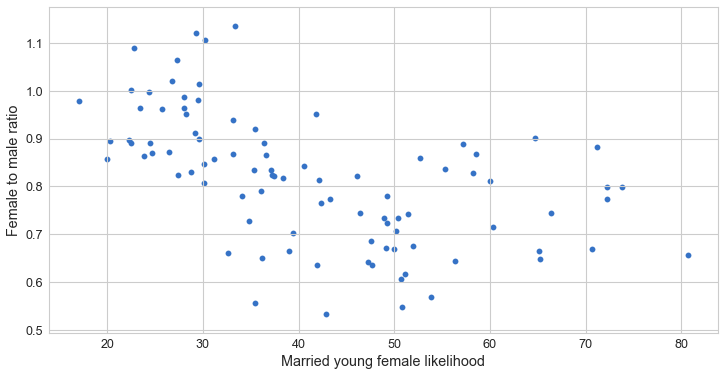

In [34]:
# to see married young female likelihood based on the locality
plt.figure(figsize=(12, 6))
plt.xlabel('Married young female likelihood')
plt.ylabel('Female to male ratio')
plt.scatter(x=df1['MYF_LH'], y=df1['ratio'])
# inference about below scatter plot
# for low ratio, young female marriage likelihood increases and vice versa
plt.savefig('fem-yflh.png')